# Supervised annotation in DeepOF - search for pre-established patterns

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lucasmiranda42/deepof/blob/master/docs/source/tutorial_notebooks/deepof_supervised_tutorial.ipynb)

##### What we'll cover:
    
* Run the supervised annotation pipeline.
* Generate Gantt plots with all traits.
* Explore trait enrichment across conditions.
* Visualize global embeddings using the retrieved traits.

In [1]:
# If using Google colab, uncomment and run this cell and the one below to set up the environment
# Note: because of how colab handles the installation of local packages, this cell will kill your runtime.
# This is not an error! Just continue with the cells below.
# import os
# !git clone -q https://github.com/mlfpm/deepof.git
# !pip install -q -e deepof --progress-bar off
# os.chdir("deepof")
# !curl --output tutorial_files.zip https://datashare.mpcdf.mpg.de/s/Hu1XjZkY9zml0mm/download
# !unzip tutorial_files.zip

In [2]:
# import os
# os.chdir("deepof")
# import os, warnings
# warnings.filterwarnings('ignore')

Let's start by importing some packages. We'll use python's os library to handle paths, pickle to load saved objects, and the data entry API within DeepOF, located in deepof.data

In [3]:
import os
import pickle
import deepof.data

We'll also need some plotting gear:

In [4]:
import deepof.visuals
import matplotlib.pyplot as plt
import seaborn as sns

### Loading a previously initiated project

As last time, we'll load the already created tutorial dataset for further processing:

In [5]:
# Load a previously saved project
my_deepof_project = deepof.data.load_project("./tutorial_files/tutorial_project")

**NOTE** to better show how DeepOF deals with statistics, all results shown in the documentation version of this tutorial were obtained using the full SI dataset, containing a total of 53 animals. If you'd like to gain access to this dataset, check out the code availability statement of the main DeepOF paper.

### Running the supervised annotation pipeline

The supervised pipeline within DeepOF aims at providing simple but generalizable annotators for a variety of single and dyadic traits (as depicted in the figure below). Each of these traits is tagged independently, which means that more than one label can be applied per time point!

![supervised](./Assets/deepof_supervised.png)

Running the pipeline is as simple as executing the `.supervised_annotation()` method in your Coordinates object. A progress bar will indicate how many videos have been processed already. Let's run it and see what happens:

In [6]:
supervised_annotation = my_deepof_project.supervised_annotation()

supervised annotations        : 100%|██████████| 53/53 [01:32<00:00,  1.74s/table, step=post processing]   


It worked! Upon inspection, we see that supervised annotations contains a dictionary-like object with experiment IDs as keys, and data frames with annotations as values:

In [7]:
supervised_annotation["20191204_Day2_SI_JB08_Test_54"]

,B_W_nose2nose,B_W_sidebyside,B_W_sidereside,B_W_nose2tail,W_B_nose2tail,B_W_nose2body,W_B_nose2body,B_W_following,W_B_following,B_climb-arena,...,W_sniff-arena,W_immobility,W_stat-lookaround,W_stat-active,W_stat-passive,W_moving,W_sniffing,W_speed,B_missing,W_missing
00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0,0
00:00:00.040002666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0,0
00:00:00.080005333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0,0
00:00:00.120008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0,0
00:00:00.160010667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,103.45860,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:09:59.799986665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.74930,0,0
00:09:59.839989332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.67433,0,0
00:09:59.879991999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.27449,0,0
00:09:59.919994666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.92463,0,0


All annotations are tracked for both animals in the data (the column names have a prefix indicating to which animal they belong -B or W for black and white, respectively-). Labels with both prefixes (such as 'B_W_nose2nose') correspond to dyadic interactions. If you have more than two animals in your data, all pairwise combinations will appear as results.

Moreover, most cells in the data frame depicted above show 0 or 1 values, indicating the presence or absence of the given trait. The only exception is speed, which is expressed in millimeters per frame.

**NOTE**: You'll also find a column per animal (depicted with `ID_missing`) indicating whether it's visible or not. This is useful to track when certain animals are completely occluded (for example, when they are in their nests).

Since the project we loaded has ROIs, we can also filter our supervised annotations with a roi number. For all frames, in which the selected mouse or mice (here mouse "B") were not inside of the roi, get set to NaN. For more details, please have a look at the [ROI tutorial](https://deepof.readthedocs.io/en/latest/tutorial_notebooks/deepof_roi_tutorial.html).

In [8]:
deepof.visuals.get_roi_data(
    coordinates=my_deepof_project,
    table_dict=supervised_annotation,
    roi_number=1,
    animals_in_roi=["B"],
    experiment_id="20191204_Day2_SI_JB08_Test_54",
)

,B_W_nose2nose,B_W_sidebyside,B_W_sidereside,B_W_nose2tail,W_B_nose2tail,B_W_nose2body,W_B_nose2body,B_W_following,W_B_following,B_climb-arena,...,W_sniff-arena,W_immobility,W_stat-lookaround,W_stat-active,W_stat-passive,W_moving,W_sniffing,W_speed,B_missing,W_missing
00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
00:00:00.040002666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
00:00:00.080005333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
00:00:00.120008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
00:00:00.160010667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,103.4586,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:09:59.799986665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:09:59.839989332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:09:59.879991999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:09:59.919994666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we know what we're looking at, let's explore a few simple analyses we can run within DeepOF:

### Generating Gantt charts with all traits

The last thing we'll do for now is to visualize all tagged patterns for a single video, using Gantt charts. To this end, let's use deepof.visuals.plot_gantt()

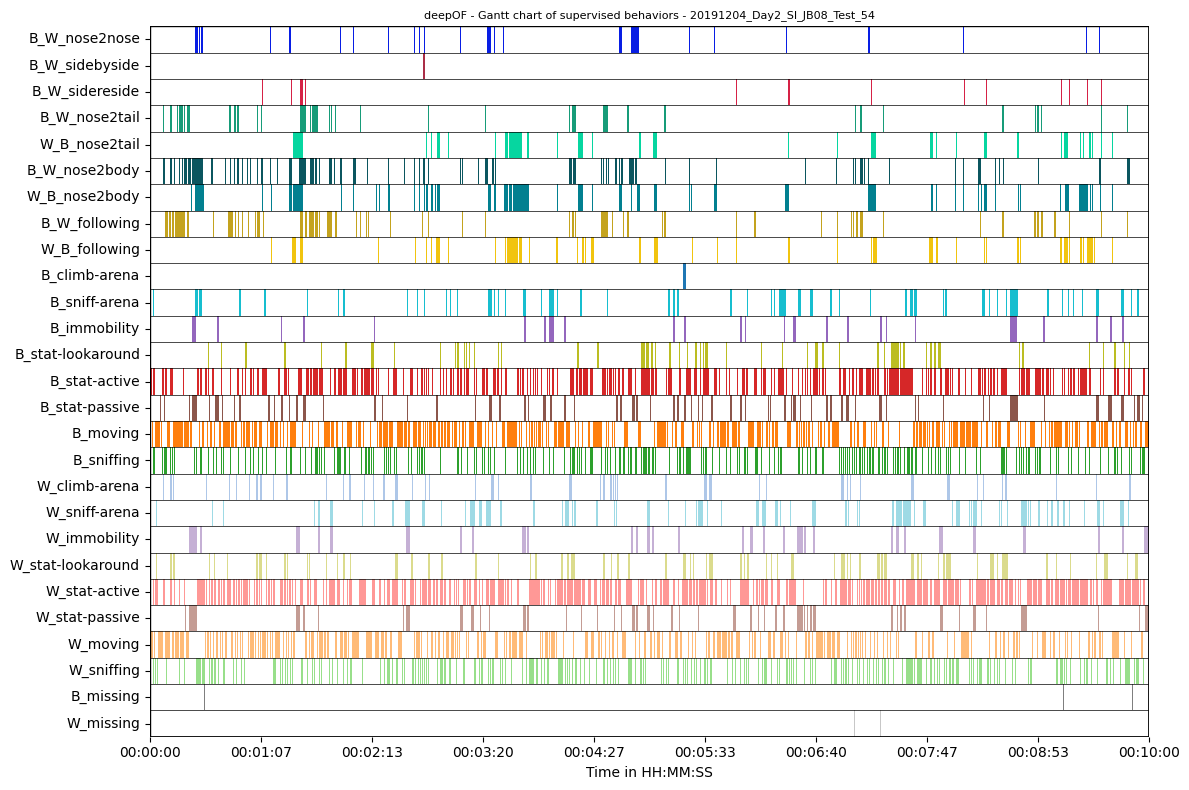

In [9]:
plt.figure(figsize=(12, 8))

deepof.visuals.plot_gantt(
    my_deepof_project,
    "20191204_Day2_SI_JB08_Test_54",
    supervised_annotations=supervised_annotation,
)

plt.show()

We see in these examples neither of the animals are significantly occluded. What we also see is that the number of behavior detections varies significantly by behavior. This is not too surprising as both animals being positioned side by side with each other will happen way less frequent than one animal moving, but what if we are interested in the exact number of events? 

For this you can use the count_all_events function that comes with various counting modes. The default is the number of events (i.e. blocks of 1s), but you can also count the total frames with "Frames" or time with "Time". For thsi example we simplay count all events in the first 60 seconds of our dataset.

In [10]:
deepof.visuals.count_all_events(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    bin_size=60,
    bin_index=0,
    counting_mode = "Events",
)

,B_W_nose2nose,B_W_sidebyside,B_W_sidereside,B_W_nose2tail,W_B_nose2tail,B_W_nose2body,W_B_nose2body,B_W_following,W_B_following,B_climb-arena,...,W_climb-arena,W_sniff-arena,W_immobility,W_stat-lookaround,W_stat-active,W_stat-passive,W_moving,W_sniffing,B_missing,W_missing
20191203_Day1_SI_JB08_Test_5,1,0,0,0,0,1,0,0,1,0,...,4,15,3,5,25,4,29,81,0,0
20191203_Day1_SI_JB08_Test_6,4,0,1,0,3,4,8,0,10,0,...,4,3,3,4,28,2,30,82,0,0
20191203_Day1_SI_JB08_Test_7,4,1,1,10,2,15,4,9,4,0,...,3,7,1,3,23,1,23,74,0,0
20191203_Day1_SI_JB08_Test_8,10,8,2,12,2,24,10,15,4,0,...,7,10,1,4,33,1,32,83,6,0
20191203_Day1_SI_JB08_Test_13,7,0,3,4,2,13,8,9,1,0,...,2,9,3,4,34,4,36,82,0,0
20191203_Day1_SI_JB08_Test_14,9,2,0,6,0,19,5,9,1,0,...,5,11,3,11,40,3,40,101,0,0
20191203_Day1_SI_JB08_Test_15,11,0,0,0,2,10,9,0,1,0,...,3,13,3,4,30,3,31,81,0,0
20191203_Day1_SI_JB08_Test_16,5,0,0,0,2,5,4,0,1,0,...,10,8,3,11,34,4,36,91,0,0
20191203_Day1_SI_JB08_Test_22,1,0,0,0,0,0,1,0,3,0,...,0,13,2,9,44,3,48,94,0,0
20191203_Day1_SI_JB08_Test_23,2,0,2,20,2,27,3,18,3,0,...,9,11,1,3,26,4,29,75,2,0


If we check experiment 20191204_Day**2**_SI_JB08_Test_54 at the near end of the table (not to confuse with 20191204_Day**1**_SI_JB08_Test_54), we see that exactly 1 B_W_sidebyside	event was counted in the first minute. Plotting the respective range of the Gantt plot confirms this (note that shorter events will get lost in a longer Gantt plot section, as they simply get too short to be depicted).

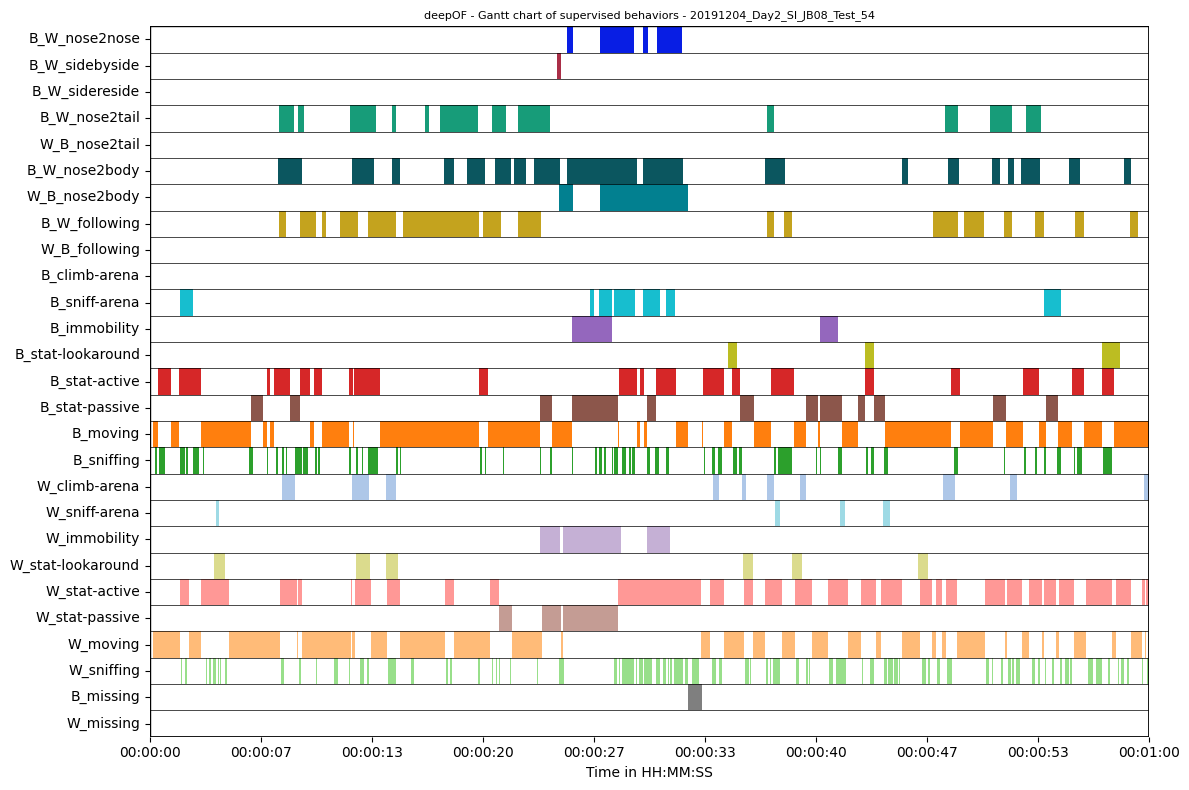

In [11]:
plt.figure(figsize=(12, 8))

deepof.visuals.plot_gantt(
    my_deepof_project,
    "20191204_Day2_SI_JB08_Test_54",
    supervised_annotations=supervised_annotation,
    bin_size=60,
    bin_index=0,
)

plt.show()

Thats good for a quick visualization, but let's indeed compare how these patterns compare across experimental conditions!

### Exploring trait enrichment across conditions.

The simplest (but quite powerful) thing to do is to test for enrichment across traits. We can compute all statistics and plot the results using the `deepof.visuals.plot_enrichment()` function. The code below creates a figure with two plots with different scales (one for speed and one for everything else, given the differences in y-axis values).

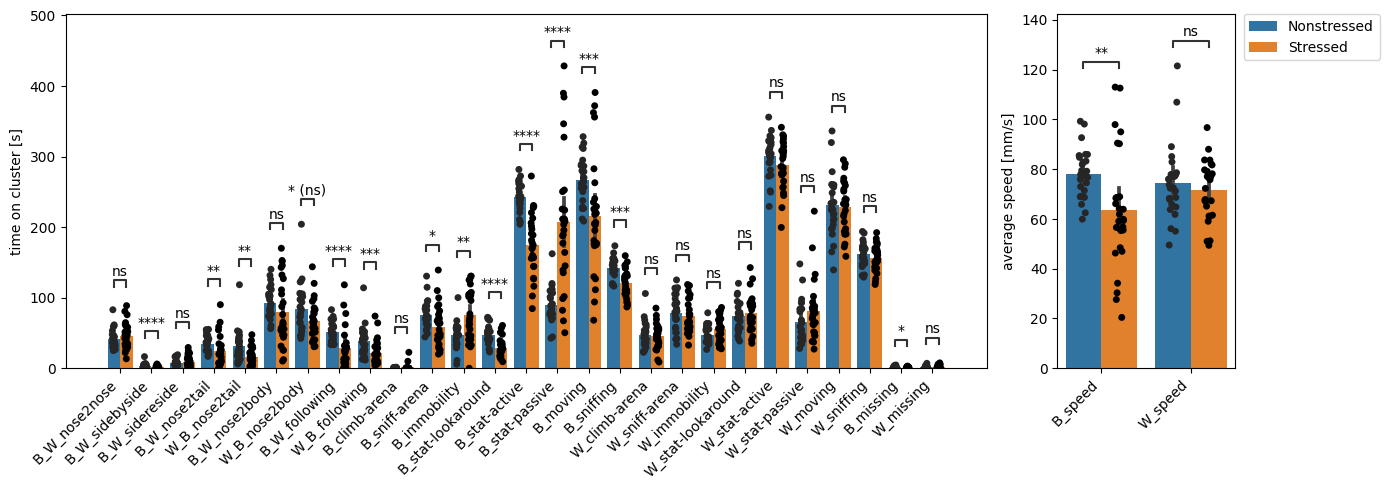

In [12]:
fig = plt.figure(figsize=(14, 5)).subplot_mosaic(
    mosaic="""
           AAAAB
           AAAAB
           """,
)

deepof.visuals.plot_enrichment(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    add_stats="Mann-Whitney",
    plot_speed=False,
    ax = fig["A"],
)

deepof.visuals.plot_enrichment(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    add_stats="Mann-Whitney",
    plot_speed=True,
    ax = fig["B"],
)

for ax in fig:
    fig[ax].set_xticklabels(fig[ax].get_xticklabels(), rotation=45, ha='right')
    fig[ax].set_title("")
    fig[ax].set_xlabel("")
    
fig["A"].get_legend().remove()

plt.tight_layout()    
plt.show()

We see DeepOF reports significant differences for many of these traits! If you'd like to print a detailed statistical summary, you can set the 'verbose' parameter to True in `deepof.visuals.plot_enrichment()`.

In the figures, you see all tagged traits in the X-axis, and the frames per video in the y-axis. Bars represent averages, and error bars standard deviations. By default, DeepOF runs a Mann-Whitney U non-parametric test on the means per test, and controls for multiple testing using Benjamini-Hochberg's method. For details on how to change both the tests to run and the multiple testing parameters, feel free to check the full API reference or the function docstring.

Most functions within DeepOF allow the user to restrict the data to certain periods of time. This can be useful to quantify habituation, for example (as we'll see), or to explore how the retrieved patterns interact with timed environmental cues (such as tones, experimental actions, etc.).

To see how this works in the context of supervised annotation enrichment, let's generate the same figure as above, but for the first two minutes of data only:

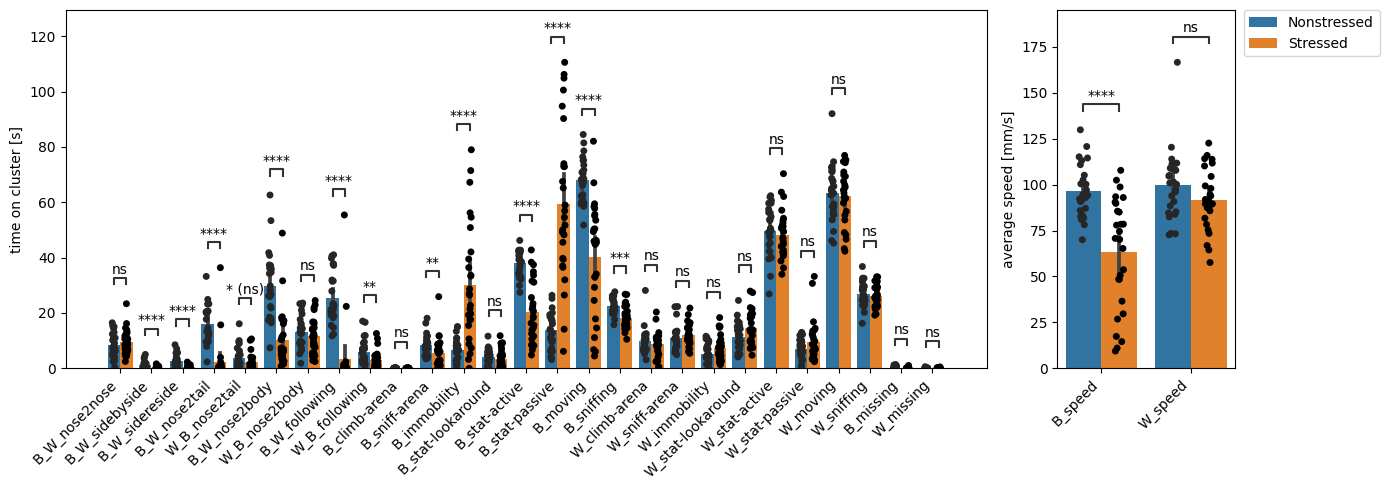

In [13]:
fig = plt.figure(figsize=(14, 5)).subplot_mosaic(
    mosaic="""
           AAAAB
           AAAAB
           """,
)

deepof.visuals.plot_enrichment(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    add_stats="Mann-Whitney",
    plot_speed=False,
    bin_index=0,
    bin_size=120,
    ax = fig["A"],
)

deepof.visuals.plot_enrichment(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    add_stats="Mann-Whitney",
    plot_speed=True,
    bin_index=0,
    bin_size=120,
    ax = fig["B"],
)

for ax in fig:
    fig[ax].set_xticklabels(fig[ax].get_xticklabels(), rotation=45, ha='right')
    fig[ax].set_title("")
    fig[ax].set_xlabel("")
    
fig["A"].get_legend().remove()

plt.tight_layout()    
plt.show()

Even though at first glance the figure may look similar, there are some important differences! For starters, the y-axis now shows lower values, since we're only looking at two minutes of data instead of ten. Moreover, the effect sizes in some tagged patterns (such as huddling or speed) are much larger. Some patterns (such as B_W_nose2body) even show high significance where they were barely different across conditions before!

To improve the visibility of differences, we can also plot the same data as a spider chart

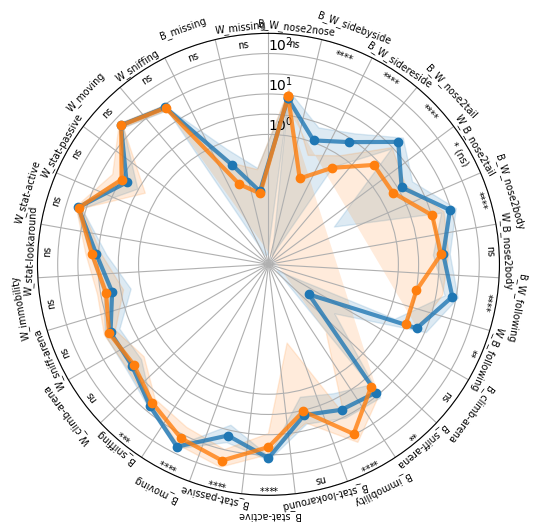

In [14]:
deepof.visuals.plot_enrichment(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    add_stats="Mann-Whitney",
    plot_speed=False,
    bin_index=0,
    bin_size=120,
    polar_depiction=True,
)

One interesting difference between our plots with and without binning is the B_W_nose2body behavior, i.e. when the black mouse approaches the white one to sniff on it's body. We can already see that the difference in the selected first 120 seconds of data is very significant but it is not significant anymore when looking at the entire dataset. Respectively it makes sense to see how this behavior changes over time. For this, deepof provides the "plot_behavior_trends" function that allowes to visualize the change of one specific behavior over time for our different groups.

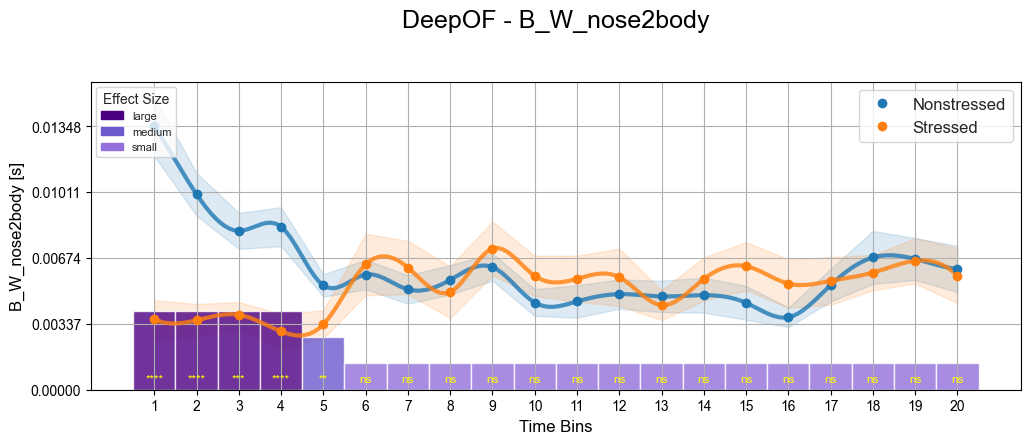

In [15]:
deepof.visuals.plot_behavior_trends(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    polar_depiction = False,
    behavior_to_plot ="B_W_nose2body",
    normalize = True,
    N_time_bins = 20,
)

plt.show()

And indeed, there is a significant time dependent difference between the Stressed and Nonstressed mice. It seems that right after being placed in the arena, the Nonstressed black mice tend to approach the white mice more often to "sniff them out". Stressed black mice are more hesitant to approach their white counterpart, which leads to the difference we just visualized.

With these we seem to already be picking up the habituation of the stressed animals to their novel environment. For more details on this specific effect and the rationale behind how it's quantified, feel free to check out the main DeepOF paper!

Whilst this may be an interesting finding, we already have another question: After establishing nose2body contact, what does the black mouse do next? One would be inclined to believe that a stressed mouse may behave way more restraint than a nonstressed one. So let's have a look at the transitions between behaviors.

### Transitions between behaviors

As in our example, the order in which behaviors are occuring can often be of interest. However, since there are $N^{2}$ possible combinations of behaviors if N is the number of behaviors, we advise against a completely explorative approach (as this would require strong corrections for multiple testing, diminishing significance). Respectively, instead of extracting all data at once, we only extract an example based on our hypothesis: A stressed black mouse will follow a dominant white mouse less often after nose2body contact than a nonstressed black mouse before habituation sets in (i.e. teh first two minutes).

In [16]:
# Transition matrices and heatmaps
deepof.visuals.return_transitions(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    visualization="heatmaps",
    bin_size=120, # we are only looking at the first two minutes of the datset as we have seen before that interactive behavior may differ the most during this time
    bin_index=0,
    #exp_condition="CSDS",
    delta_T=2, # Up to 2 seconds after the nose2nose behavior has ended a subsequent following behavior is counted as a transition.
    normalize=False, # we count absolute numbers of occurences
)["B_W_nose2body-x-B_W_following"]


20191203_Day1_SI_JB08_Test_5      0.0
20191203_Day1_SI_JB08_Test_6      0.0
20191203_Day1_SI_JB08_Test_7      3.0
20191203_Day1_SI_JB08_Test_8      9.0
20191203_Day1_SI_JB08_Test_13     7.0
20191203_Day1_SI_JB08_Test_14     8.0
20191203_Day1_SI_JB08_Test_15     2.0
20191203_Day1_SI_JB08_Test_16     1.0
20191203_Day1_SI_JB08_Test_22     0.0
20191203_Day1_SI_JB08_Test_23     7.0
20191203_Day1_SI_JB08_Test_24     9.0
20191203_Day1_SI_JB08_Test_29     6.0
20191203_Day1_SI_JB08_Test_30     2.0
20191203_Day1_SI_JB08_Test_31     0.0
20191203_Day1_SI_JB08_Test_32     2.0
20191203_Day1_SI_JB08_Test_37     0.0
20191203_Day1_SI_JB08_Test_38     0.0
20191203_Day1_SI_JB08_Test_39     6.0
20191203_Day1_SI_JB08_Test_40     9.0
20191203_Day1_SI_JB08_Test_45    12.0
20191203_Day1_SI_JB08_Test_46     7.0
20191203_Day1_SI_JB08_Test_47     0.0
20191203_Day1_SI_JB08_Test_53     0.0
20191203_Day1_SI_JB08_Test_54     4.0
20191203_Day1_SI_JB08_Test_55     5.0
20191203_Day1_SI_JB08_Test_56     5.0
20191204_Day

You could use this extracted dataset to conduct an appropriate test. Appropriate testing functionality is not yet implemented for this function at the moment, but will be added in the future.

When summed up by condition, this shows a very distinct difference between groups. 

In [17]:
# Transition matrices and heatmaps
deepof.visuals.return_transitions(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    visualization="heatmaps",
    bin_size=120,
    bin_index=0,
    exp_condition="CSDS",
    delta_T=2,
    normalize=False,
    silence_diagonal=True,
)["B_W_nose2body-x-B_W_following"]

Nonstressed    161.0
Stressed        21.0
Name: B_W_nose2body-x-B_W_following, dtype: float64

The difference also stays pronounced after normalizing for the number of behavior occurences. The normalization option for the supervised behaviors here normalizes for each behavior pair to the sum of occurences of both behaviors - 1 (This correspons to the maximum number of possible transitions that could be detected). Since we have less instances of B_W_nose2body interactions in the stressed mice than in the nonstressed ones, the relative difference between groups decreases but is still sizable (about a factor of 2.7 instead of 7.6 without normalization).

**Note:** Even with normalization, behaviors that occur very frequently, like moving, will gravitate towards higher absolute and relative numbers simply as the possibility that another behavior occurs close to the frequently occuring one just by chance is higher. For now, we decided to go with this simple option as it facilitates interpretability.  

In [18]:
# Transition matrices and heatmaps
deepof.visuals.return_transitions(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    visualization="heatmaps",
    bin_size=120,
    bin_index=0,
    exp_condition="CSDS",
    delta_T=2,
    normalize=True,
    silence_diagonal=True,
)["B_W_nose2body-x-B_W_following"]

Nonstressed    0.276158
Stressed       0.105528
Name: B_W_nose2body-x-B_W_following, dtype: float64

**Note:** delta_T does also merge behavior blocks that are closer than delta_T to each other into one. The rationale behind this is that we want to avoid multi-counting of single transitions if one prolonged behavior is followed by multiple instances of a very short behavior in close succession.  

Obviously, you can also just plot everything.

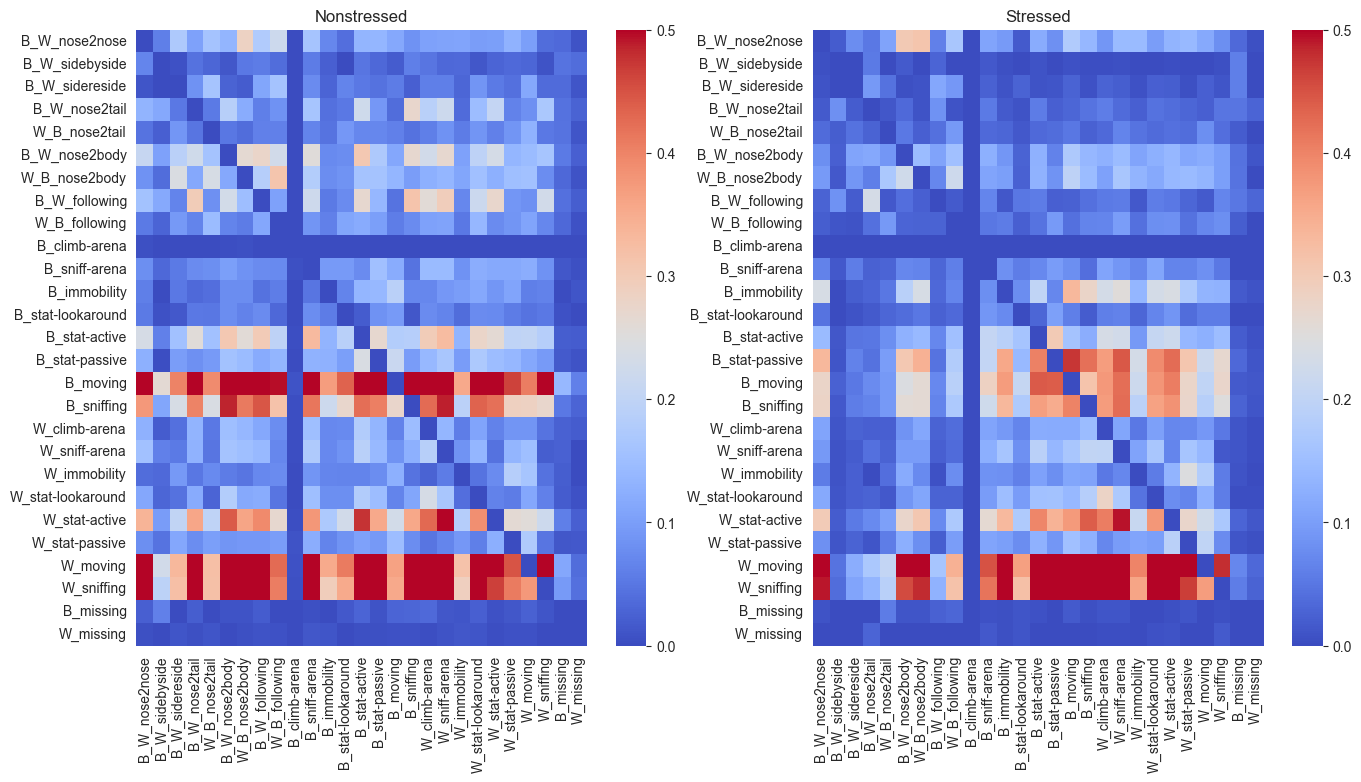

In [19]:
deepof.visuals.plot_transitions(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    visualization="heatmaps",
    bin_size=120,
    bin_index=0,
    exp_condition="CSDS",
    delta_T=2,
    normalize=True,
    silence_diagonal=True,
)

The behavior transition functionality is something that we are going to expand upon in future updates. Respectively, if you have any feedback, please let us know.  

For now, let's continue with another interesting tool: PCA projections.

### PCA embedding of supervised traits

An often useful way of looking at multivariate data (such as the supervised_annotation vectors we generated before) is to project them in the lower-dimensional space. We'll explore more sophisticated ways of doing that in the next tutorial, but for now we can just run these vectors through PCA. DeepOF allows us to do this with the `deepof.visuals.plot_embeddings()` function.

Moreover, we can also restrict the analysis over time. Let's compare, again, the whole data to the first two minutes:

Info! Set aggregate_experiments to -mean- since supervised annotations were given!
Info! Set aggregate_experiments to -mean- since supervised annotations were given!


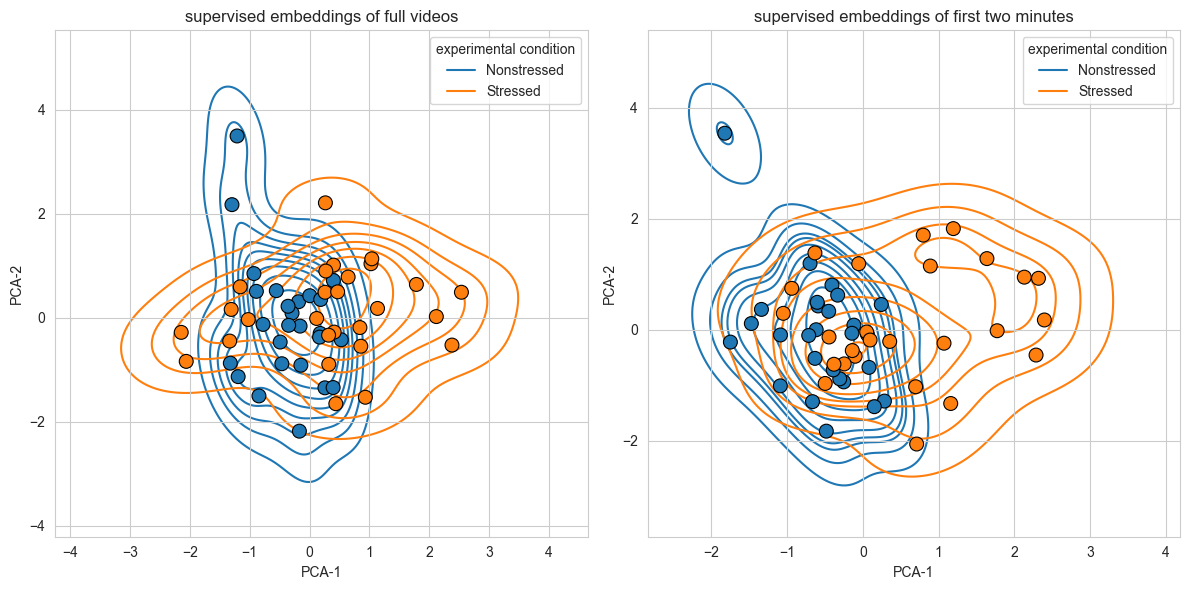

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

deepof.visuals.plot_embeddings(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    ax=ax1,
)
deepof.visuals.plot_embeddings(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    bin_size=120,
    bin_index=0,
    ax=ax2,
)

ax1.set_title("supervised embeddings of full videos")
ax2.set_title("supervised embeddings of first two minutes")

plt.tight_layout()
plt.show()

We can see how, indeed, the PCA on the average set of annotators seems to distinguish across conditions better when looking at the first two minutes only. We'll continue to explore this idea in the next tutorial.

Last but not least, DeepOF offers a function that can easily detect coarse differences between cohorts. We can do this by adding the `normative_model` parameter to the `plot_embeddings` function described above. This will fit a kernel density to the data under the specified condition, and report the likelihood of each animal under this learned distribution. 

The returned figure will then have two panels, with the embeddings on the left (same as before) and the likelihoods on the right, centered around the mean likelihood for the cohort defined as control. In this scale, negative values correspond to animals whose behavior deviates from the expected under the control distribution. Significance testing is also automatically added, using a Mann-Whitney U test by default. Check the [full API](https://deepof.readthedocs.io/en/latest/deepof.html#deepof.visuals.plot_embeddings) for details on how to change these defaults. 

Note that, as in the cell above, we need to also specify `exp_condition` if more than one annotation per animal is present under `my_deepof_project.get_exp_conditions`.

Info! Set aggregate_experiments to -mean- since supervised annotations were given!


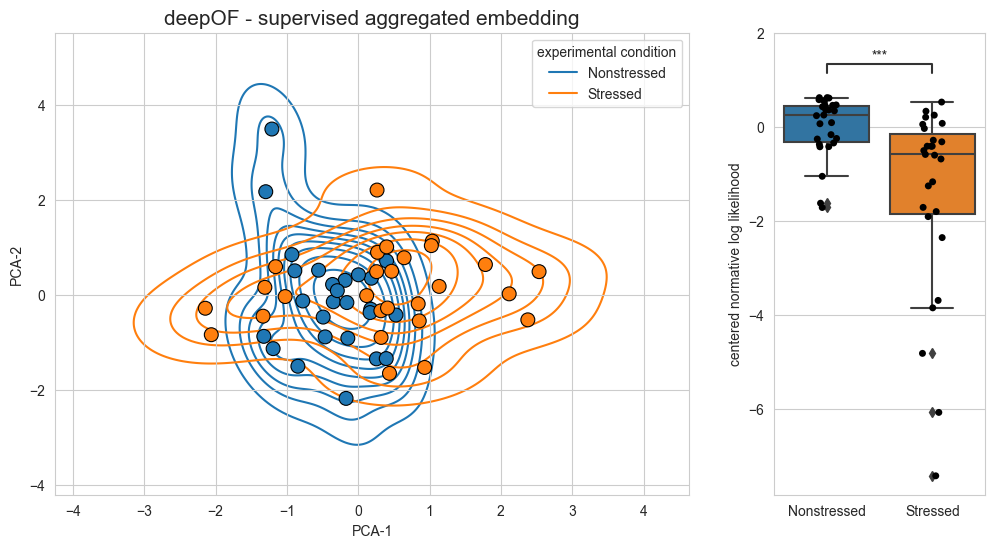

In [21]:
deepof.visuals.plot_embeddings(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    exp_condition="CSDS", # The name of the condition to compare. Only necessary if more than one condition is present
    normative_model="Nonstressed", # The name of the controls under the specified condition. Should be an instance of exp_condition
)

Here, we see that the stressed animals (in orange) are significantly different from the non-stressed ones (in blue), which is reflected by lower values in the likelihood plot. This is a coarse but potentially insightful way to quickly assess differences between cohorts. You can always delve deeper afterwards.

### What's next

That's it for this second tutorial. [Next](https://deepof.readthedocs.io/en/latest/tutorial_notebooks/deepof_unsupervised_tutorial.html) and last for now, we'll explore the main forte of the package: we'll learn to embed our data in a sequence-aware manner, to get behavioral patterns in an unsupervised way using deep clustering (where the "deep" in DeepOF comes from). See you there!